In [20]:
import pandas as pd
df=pd.read_csv(r'E:\BSAI-5th\DataMining\Traffic  Sign Recognition System\GTSRB\Train.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def load_kaggle_data(csv_path, img_dir):
    data = pd.read_csv(csv_path)
    images, labels = [], []

    for i, row in data.iterrows():
        img_path = os.path.join(img_dir, row['Path'])
        img = cv2.imread(img_path)

        if img is None:
            print(f"[WARNING] Failed to load image: {img_path}")
            continue

        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        images.append(img)
        labels.append(row['ClassId'])

    images = np.array(images)
    labels = to_categorical(labels, num_classes=43)
    return images, labels

X_train, y_train = load_kaggle_data(
    r"E:\BSAI-5th\DataMining\Traffic  Sign Recognition System\GTSRB\Train.csv",
    r"E:\BSAI-5th\DataMining\Traffic  Sign Recognition System\GTSRB"
)

X_test, y_test = load_kaggle_data(
    r"E:\BSAI-5th\DataMining\Traffic  Sign Recognition System\GTSRB\Test.csv",
    r"E:\BSAI-5th\DataMining\Traffic  Sign Recognition System\GTSRB"
)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.5),
  Dense(43, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


E:\BSAI-5th\DataMining\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,284,203 (4.90 MB)

 Trainable params: 1,284,203 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(X_test, y_test))

E:\BSAI-5th\DataMining\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 117s 176ms/step - accuracy: 0.2573 - loss: 2.6782 - val_accuracy: 0.7003 - val_loss: 0.9011
Epoch 2/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 108s 175ms/step - accuracy: 0.6881 - loss: 0.9616 - val_accuracy: 0.8624 - val_loss: 0.4198
Epoch 3/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 108s 176ms/step - accuracy: 0.8286 - loss: 0.5182 - val_accuracy: 0.9253 - val_loss: 0.2464
Epoch 4/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 124s 202ms/step - accuracy: 0.8891 - loss: 0.3368 - val_accuracy: 0.9413 - val_loss: 0.2255
Epoch 5/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 130s 211ms/step - accuracy: 0.9279 - loss: 0.2367 - val_accuracy: 0.9595 - val_loss: 0.1638
Epoch 6/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 125s 205ms/step - accuracy: 0.9426 - loss: 0.1829 - val_accuracy: 0.9654 - val_loss: 0.1565
Epoch 7/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 129s 210ms/step - accuracy: 0.9536 - loss: 0.1514 - val_accuracy: 0.9664 - val_loss: 0.1545
Epoch 8/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 121s 197ms/step - accuracy: 0.9591 -

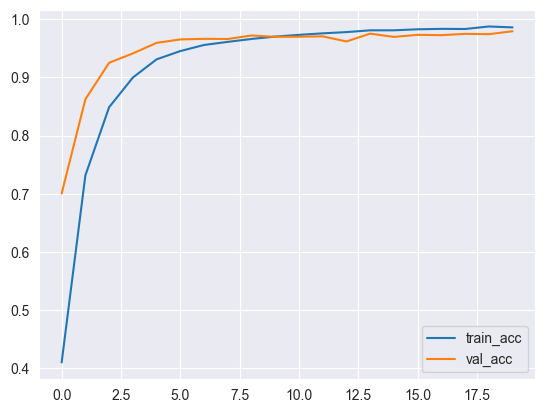

395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


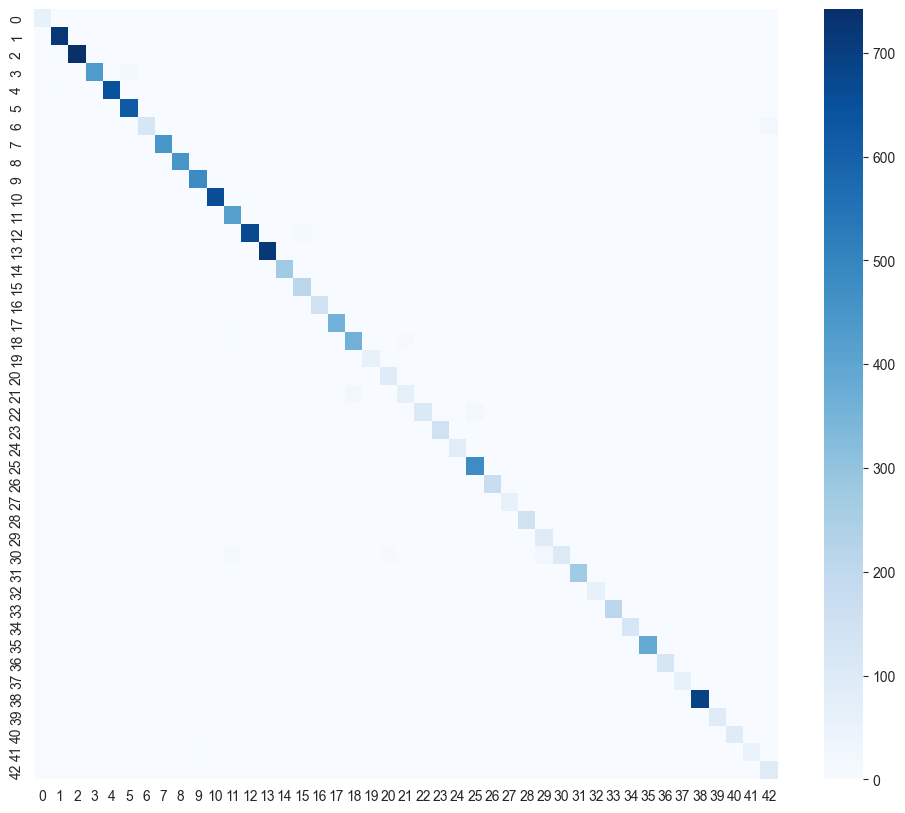

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot accuracy & loss
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.show()


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.99      0.96      0.98       450
           4       1.00      0.98      0.99       660
           5       0.97      0.99      0.98       630
           6       1.00      0.83      0.91       150
           7       1.00      1.00      1.00       450
           8       0.99      1.00      1.00       450
           9       0.98      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       0.95      1.00      0.97       420
          12       1.00      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [17]:
model.save("traffic_sign_cnn.h5")


In [18]:
model.save("traffic_sign_cnn.keras")

Improve Accuracy (Fine-Tuning & Boosting)
 Add Data Augmentation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Fit and retrain model
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=25,
                    validation_data=(X_test, y_test))


Epoch 1/25


E:\BSAI-5th\DataMining\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


613/613 ━━━━━━━━━━━━━━━━━━━━ 112s 183ms/step - accuracy: 0.9872 - loss: 0.0431 - val_accuracy: 0.9819 - val_loss: 0.0853
Epoch 2/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 116s 189ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9793 - val_loss: 0.0940
Epoch 3/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 121s 198ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.9801 - val_loss: 0.1126
Epoch 4/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 131s 213ms/step - accuracy: 0.9873 - loss: 0.0439 - val_accuracy: 0.9802 - val_loss: 0.0998
Epoch 5/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 136s 222ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9766 - val_loss: 0.1336
Epoch 6/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 139s 226ms/step - accuracy: 0.9885 - loss: 0.0339 - val_accuracy: 0.9767 - val_loss: 0.1388
Epoch 7/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 140s 229ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9782 - val_loss: 0.1108
Epoch 8/25
613/613 ━━━━━━━━━━━━━━━━━━━━ 145s 236ms/step - accuracy: 0.9916 - loss: 0.02

Pretrained CNN (MobileNetV2)

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(include_top=False, input_shape=(64,64,3), weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\wasif\AppData\Local\Temp\ipykernel_16252\2428134469.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_shape=(64,64,3), weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 25s 3us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=(X_test, y_test))


Epoch 1/15


E:\BSAI-5th\DataMining\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


613/613 ━━━━━━━━━━━━━━━━━━━━ 130s 202ms/step - accuracy: 0.3480 - loss: 2.3397 - val_accuracy: 0.4916 - val_loss: 1.5926
Epoch 2/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 116s 189ms/step - accuracy: 0.5737 - loss: 1.3237 - val_accuracy: 0.5142 - val_loss: 1.5116
Epoch 3/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 124s 203ms/step - accuracy: 0.6228 - loss: 1.1497 - val_accuracy: 0.5283 - val_loss: 1.4856
Epoch 4/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 133s 217ms/step - accuracy: 0.6469 - loss: 1.0684 - val_accuracy: 0.5338 - val_loss: 1.4619
Epoch 5/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 145s 236ms/step - accuracy: 0.6689 - loss: 0.9931 - val_accuracy: 0.5436 - val_loss: 1.4594
Epoch 6/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 136s 221ms/step - accuracy: 0.6784 - loss: 0.9653 - val_accuracy: 0.5475 - val_loss: 1.4640
Epoch 7/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 134s 218ms/step - accuracy: 0.6880 - loss: 0.9254 - val_accuracy: 0.5470 - val_loss: 1.4667
Epoch 8/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 139s 226ms/step - accuracy: 0.6946 - loss: 0.90

In [25]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5558 - loss: 1.5208
Test Accuracy: 0.5543


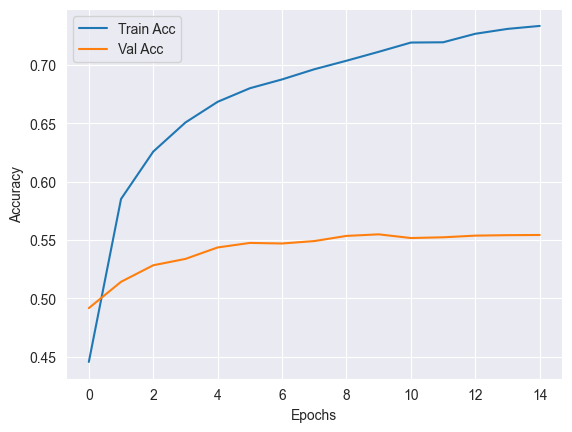

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step
              precision    recall  f1-score   support

           0       0.33      0.13      0.19        60
           1       0.55      0.51      0.53       720
           2       0.39      0.50      0.44       750
           3       0.38      0.29      0.33       450
           4       0.50      0.47      0.48       660
           5       0.53      0.52      0.53       630
           6       0.79      0.47      0.59       150
           7       0.50      0.55      0.52       450
           8       0.40      0.40      0.40       450
           9       0.69      0.61      0.64       480
          10       0.67      0.81      0.73       660
          11       0.36      0.43      0.39       420
          12       0.90      0.91      0.90       690
          13       0.89      0.94      0.91       720
          14       0.85      0.87      0.86       270
          15       0.98      0.94      0.96       210
          16       0.85      0.70     

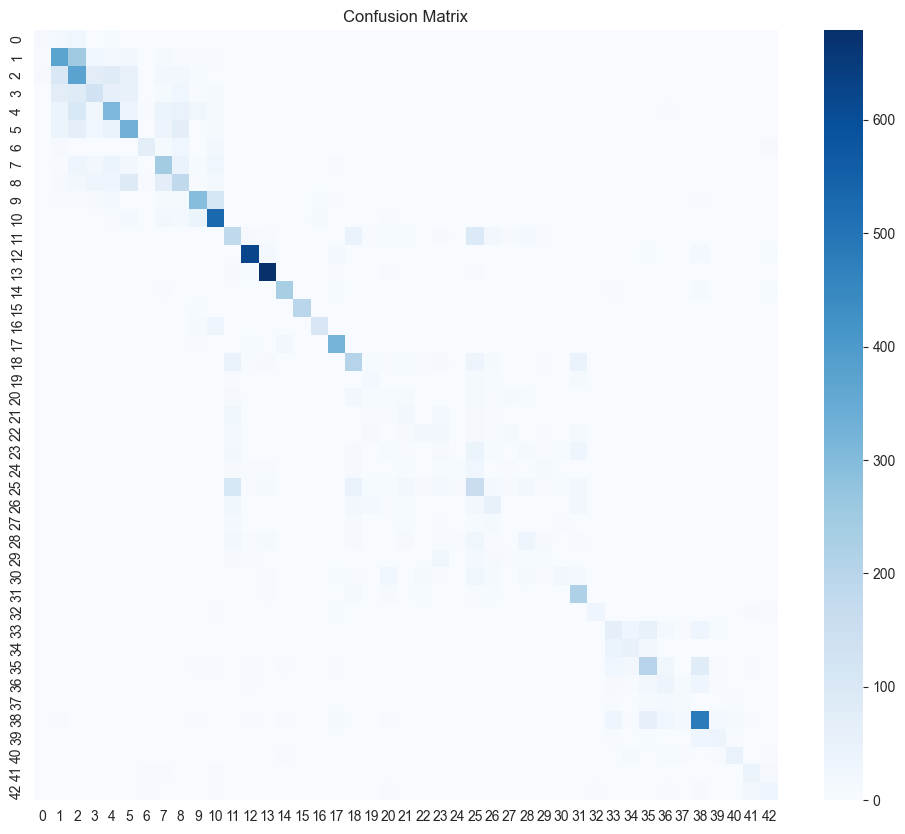

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [28]:
model.save("mobilenet_traffic_sign.h5")